### Source: https://learnopencv.com/human-pose-estimation-using-keypoint-rcnn-in-pytorch/

In [1]:
import torch
import torchvision
from torchvision import transforms as T

import numpy as np

import cv2
import matplotlib.pyplot as plt

import os

In [12]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained = True)
model.eval();

In [13]:
model#.to('cuda');

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [4]:
keypoints = ['nose','left_eye','right_eye',\
'left_ear','right_ear','left_shoulder',\
'right_shoulder','left_elbow','right_elbow',\
'left_wrist','right_wrist','left_hip',\
'right_hip','left_knee', 'right_knee', \
'left_ankle','right_ankle']

In [5]:
limbs = [('right_eye','nose'),('right_eye','right_ear'),('left_eye','nose'),
         ('left_eye','left_ear'),('right_shoulder','right_elbow'),('right_elbow','right_wrist'),
         ('left_shoulder','left_elbow'),('left_elbow','left_wrist'),('right_shoulder','left_shoulder'),
         ('right_shoulder','right_hip'),('left_shoulder','left_hip'),('right_hip','left_hip'),
         ('right_hip','right_knee'),('right_knee','right_ankle'),('left_hip','left_knee'),('left_knee','left_ankle'),
        ]

In [6]:
limb_ids = [(keypoints.index(start), keypoints.index(end)) for start,end in limbs]

In [7]:
print(limb_ids)

[(2, 0), (2, 4), (1, 0), (1, 3), (6, 8), (8, 10), (5, 7), (7, 9), (6, 5), (6, 12), (5, 11), (12, 11), (12, 14), (14, 16), (11, 13), (13, 15)]


In [8]:
#img_path = 'data/sample_src.jpeg'
#img = cv2.imread(img_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#
#img_small = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
#
#plt.show()
#
#cv2.imwrite('data/sample_small.jpg', img_small)

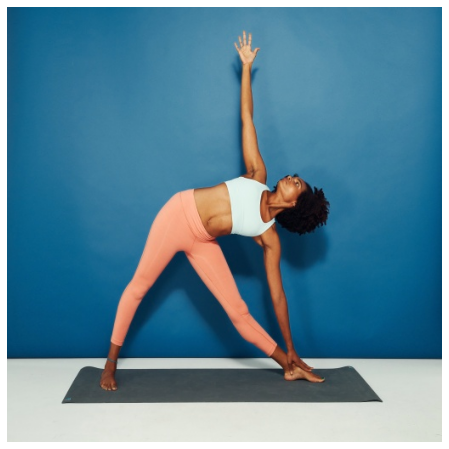

In [14]:
img_path = 'data/sample_small.jpg'
img = cv2.imread(img_path)

plt.figure(figsize = (8,8))
plt.imshow(img);
plt.axis('off');

In [19]:
transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)#.to('cuda')

In [16]:
model

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [20]:
%%time
with torch.no_grad():
    output = model([img_tensor])[0]

CPU times: user 5.01 s, sys: 332 ms, total: 5.34 s
Wall time: 1.01 s


In [21]:
model.to('cuda')
img_tensor = img_tensor.to('cuda')

In [22]:
%%time
with torch.no_grad():
    output = model([img_tensor])[0]

CPU times: user 73.3 ms, sys: 0 ns, total: 73.3 ms
Wall time: 72.5 ms


In [11]:
output

{'boxes': tensor([[109.1024,  45.6483, 382.5507, 459.4755]]),
 'labels': tensor([1]),
 'scores': tensor([0.9997]),
 'keypoints': tensor([[[333.6750, 201.3932,   1.0000],
          [343.2585, 206.5101,   1.0000],
          [337.5084, 199.4743,   1.0000],
          [333.0362, 241.0490,   1.0000],
          [335.5917, 258.9580,   1.0000],
          [309.3969, 264.0749,   1.0000],
          [294.7023, 193.0783,   1.0000],
          [319.6193, 339.5488,   1.0000],
          [280.6465, 127.8381,   1.0000],
          [310.0358, 280.0651,   1.0000],
          [280.0076,  74.1109,   1.0000],
          [230.8125, 268.5522,   1.0000],
          [202.7009, 244.2470,   1.0000],
          [274.8964, 363.2144,   1.0000],
          [153.5058, 331.2339,   1.0000],
          [331.7584, 419.5000,   1.0000],
          [123.4776, 415.0227,   1.0000]]]),
 'keypoints_scores': tensor([[16.4199, 17.5362, 11.6606, 11.8307,  5.3667,  9.4907, 10.2199, 10.6589,
          12.6204,  8.8989, 12.5323,  6.8663,  9.5524

In [66]:
def draw_keypoints_per_person(img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
    # initialize a set of colors from the rainbow spectrum
    cmap = plt.get_cmap('rainbow')
    # create a copy of the image
    img_copy = img.copy()
    # pick a set of N color-ids from the spectrum
    color_id = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
    # iterate for every person detected
    for person_id in range(len(all_keypoints)):
      # check the confidence score of the detected person
      if confs[person_id]>conf_threshold:
        # grab the keypoint-locations for the detected person
        keypoints = all_keypoints[person_id, ...]
        # grab the keypoint-scores for the keypoints
        scores = all_scores[person_id, ...]
        # iterate for every keypoint-score
        for kp in range(len(scores)):
            # check the confidence score of detected keypoint
            if scores[kp]>keypoint_threshold:
                # convert the keypoint float-array to a python-list of integers
                keypoint = tuple(map(int, keypoints[kp, :2].detach().numpy().tolist()))
                # pick the color at the specific color-id
                color = tuple(np.asarray(cmap(color_id[person_id])[:-1])*255)
                # draw a circle over the keypoint location
                cv2.circle(img_copy, keypoint, 5, color, -1)

    return img_copy

In [67]:
keypoints_img = draw_keypoints_per_person(img, output["keypoints"], output["keypoints_scores"], output["scores"], keypoint_threshold=2)

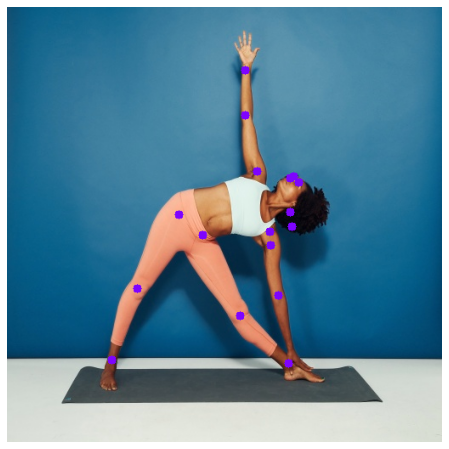

In [68]:
plt.figure(figsize = (8,8))
plt.imshow(keypoints_img);
plt.axis('off');

In [76]:
def get_limbs_from_keypoints(keypoints):
    limbs = [       
        [keypoints.index('right_eye'), keypoints.index('nose')],
        [keypoints.index('right_eye'), keypoints.index('right_ear')],
        [keypoints.index('left_eye'), keypoints.index('nose')],
        [keypoints.index('left_eye'), keypoints.index('left_ear')],
        [keypoints.index('right_shoulder'), keypoints.index('right_elbow')],
        [keypoints.index('right_elbow'), keypoints.index('right_wrist')],
        [keypoints.index('left_shoulder'), keypoints.index('left_elbow')],
        [keypoints.index('left_elbow'), keypoints.index('left_wrist')],
        [keypoints.index('right_hip'), keypoints.index('right_knee')],
        [keypoints.index('right_knee'), keypoints.index('right_ankle')],
        [keypoints.index('left_hip'), keypoints.index('left_knee')],
        [keypoints.index('left_knee'), keypoints.index('left_ankle')],
        [keypoints.index('right_shoulder'), keypoints.index('left_shoulder')],
        [keypoints.index('right_hip'), keypoints.index('left_hip')],
        [keypoints.index('right_shoulder'), keypoints.index('right_hip')],
        [keypoints.index('left_shoulder'), keypoints.index('left_hip')]
        ]
    return limbs

limbs = get_limbs_from_keypoints(keypoints)

In [82]:
def draw_skeleton_per_person(img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
    
    # initialize a set of colors from the rainbow spectrum
    cmap = plt.get_cmap('rainbow')
    # create a copy of the image
    img_copy = img.copy()
    # check if the keypoints are detected
    if len(output["keypoints"])>0:
      # pick a set of N color-ids from the spectrum
      colors = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
      # iterate for every person detected
      for person_id in range(len(all_keypoints)):
          # check the confidence score of the detected person
          if confs[person_id]>conf_threshold:
            # grab the keypoint-locations for the detected person
            keypoints = all_keypoints[person_id, ...]

            # iterate for every limb 
            for limb_id in range(len(limbs)):
              # pick the start-point of the limb
              limb_loc1 = keypoints[limbs[limb_id][0], :2].detach().numpy().astype(np.int32)
              # pick the start-point of the limb
              limb_loc2 = keypoints[limbs[limb_id][1], :2].detach().numpy().astype(np.int32)
              # consider limb-confidence score as the minimum keypoint score among the two keypoint scores
              limb_score = min(all_scores[person_id, limbs[limb_id][0]], all_scores[person_id, limbs[limb_id][1]])
              # check if limb-score is greater than threshold
              if limb_score> keypoint_threshold:
                # pick the color at a specific color-id
                color = tuple(np.asarray(cmap(colors[person_id])[:-1])*255)
                # draw the line for the limb
                cv2.line(img_copy, tuple(limb_loc1), tuple(limb_loc2), color, 1)

    return img_copy

In [83]:
skeletal_img = draw_skeleton_per_person(img, output["keypoints"], output["keypoints_scores"], output["scores"],keypoint_threshold=2)

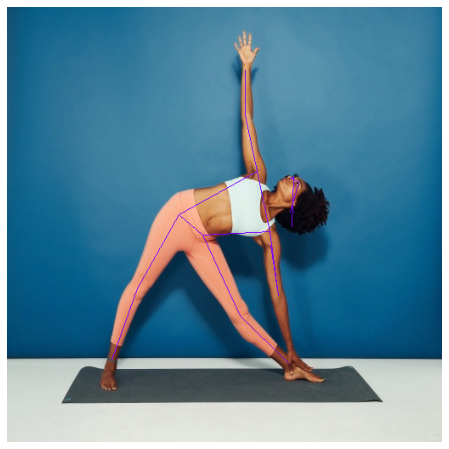

In [84]:
plt.figure(figsize = (8,8))
plt.imshow(skeletal_img)
plt.axis('off');